In [1]:
import numpy as np

import os

from statsmodels.stats.api import DescrStatsW
from scipy.stats import ttest_rel, sem

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = 'gpidaph'
group_size = 1
num_exps = 120
num_repeats_per_exp = 1

policies = [
    'ens jensen greedy',
    # 'greedy',
    'classical ens',
    # 'round robin greedy',
]

n_classes = group_size + 1
init_size = 1
budget = 500

basepath = os.path.join('../../data/results', data)


probs = np.ones(
    (len(policies), num_exps, num_repeats_per_exp, budget)
) * -1

for p_ind, policy in enumerate(policies):
    for exp_ind in range(num_exps):
        path = os.path.join(basepath, f'{data}{exp_ind + 1}', str(group_size), policy)
        for i in range(num_repeats_per_exp):
            tmp_probs = np.loadtxt(
                os.path.join(path, f'{policy}__probs__{i + 1}.csv'), 
                delimiter=','
            )[:, 1]

            probs[p_ind, exp_ind, i, :] = tmp_probs
        
assert np.all(probs != -1)

In [3]:
squeezed_probs = probs.reshape(
    len(policies), 
    num_exps * num_repeats_per_exp,
    budget
)

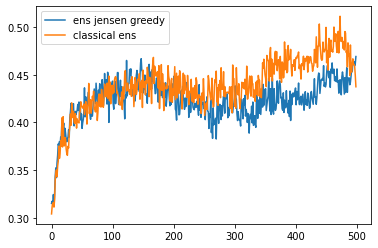

In [4]:
for p_ind, policy in enumerate(policies):
    plt.plot(squeezed_probs[p_ind].mean(axis=0), label=policy)
    
plt.legend();

/Users/quannguyen/anaconda3/envs/diverse_as/lib/python3.7/site-packages/numpy/lib/polynomial.py:658: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/Users/quannguyen/anaconda3/envs/diverse_as/lib/python3.7/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Users/quannguyen/anaconda3/envs/diverse_as/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/quannguyen/anaconda3/envs/diverse_as/lib/python3.7/site-packages/numpy/lib/polynomial.py:658: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/Users/quannguyen/anaconda3/envs/diverse_as/lib/python3.7/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, init

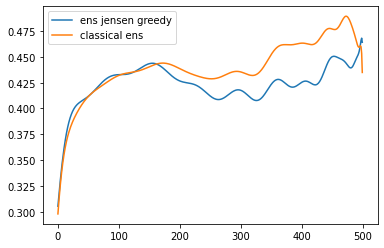

In [5]:
for p_ind, policy in enumerate(policies):
    poly = np.polyfit(
        np.arange(budget), 
        squeezed_probs[p_ind].mean(axis=0), 
        101
    )
    
    plt.plot(np.poly1d(poly)(np.arange(budget)), label=policy)
    
plt.legend();